In [370]:
## singularize

simple_sentence = "Business Process Management systems (BPMS) are a rich source of events that document the execution of processes and activities within these systems. "

print("""**inflection을 사용하여 singularize를 한 경우""")
from inflection import singularize
for w in simple_sentence.lower().split(" "):
    if w != singularize(w):
        print("{} ==> {}".format(w, singularize(w)))
print()
print("""**textblob를 활용하여 singularize를 한 경우 """)
from textblob import TextBlob
blob = TextBlob(simple_sentence.lower())
for w in blob.words:
    if w != w.singularize():
        print("{} ==> {}".format(w, w.singularize()))

**inflection을 사용하여 singularize를 한 경우
systems ==> system
events ==> event
processes ==> process
activities ==> activity

**textblob를 활용하여 singularize를 한 경우 
business ==> busines
process ==> proces
systems ==> system
bpms ==> bpm
events ==> event
processes ==> process
activities ==> activity
systems ==> system


In [ ]:
"""구글 스칼라에서 검색한 논문의 초록을 가져왔습니다. 
"""
simple_text = """
Business Process Management systems (BPMS) are a rich source of events that document the execution of processes and activities within these systems. 
Business Process Management analytics is the family of methods and tools that can be applied to these event streams in order to support decision making in organizations. 
The analysis of process events can focus on the behavior of completed processes, evaluate currently running process instances, or focus on predicting the behavior of process instances in the future. 
This chapter provides an overview of the different methods and technologies that can be employed in each of these three areas of process analytics. 
We discuss the underlying format and types of process events as the common source of analytics information, present techniques for the aggregation and composition of these events, and outline methods that support backward- and forward-looking process analytics.
"""

In [430]:
simple_sentence = """
Business Process Management systems (BPMS) are a rich source of events that document the execution of processes and activities within these systems. 
"""
simple_text
from textblob import TextBlob
blob = TextBlob(simple_sentence).lower()
print("words: {}".format(blob.words))
print()
print("noun_phrases: {}".format(blob.noun_phrases))
print()
print("word and tags: {}".format(blob.tags))
print()
print("n grams: {}".format(blob.ngrams(2)))
print()

words: ['business', 'process', 'management', 'systems', 'bpms', 'are', 'a', 'rich', 'source', 'of', 'events', 'that', 'document', 'the', 'execution', 'of', 'processes', 'and', 'activities', 'within', 'these', 'systems']

noun_phrases: ['business process management systems', 'rich source']

word and tags: [('business', 'NN'), ('process', 'NN'), ('management', 'NN'), ('systems', 'NNS'), ('bpms', 'NN'), ('are', 'VBP'), ('a', 'DT'), ('rich', 'JJ'), ('source', 'NN'), ('of', 'IN'), ('events', 'NNS'), ('that', 'WDT'), ('document', 'VBP'), ('the', 'DT'), ('execution', 'NN'), ('of', 'IN'), ('processes', 'NNS'), ('and', 'CC'), ('activities', 'NNS'), ('within', 'IN'), ('these', 'DT'), ('systems', 'NNS')]

n grams: [WordList(['business', 'process']), WordList(['process', 'management']), WordList(['management', 'systems']), WordList(['systems', 'bpms']), WordList(['bpms', 'are']), WordList(['are', 'a']), WordList(['a', 'rich']), WordList(['rich', 'source']), WordList(['source', 'of']), WordList(['o

In [434]:
#from nltk.tokenize import sent_tokenize, word_tokenize



import nltk.tokenize

simple_text = """
Business Process Management systems (BPMS) are a rich source of events that document the execution of processes and activities within these systems. 
Business Process Management analytics is the family of methods and tools that can be applied to these event streams in order to support decision making in organizations. 
""".lower().strip()

print(nltk.tokenize.sent_tokenize(simple_text))
print(nltk.tokenize.word_tokenize(simple_text))

"""make n grams 
"""
from nltk import ngrams
print(list(ngrams(nltk.tokenize.word_tokenize("I am a boy"), 2)))

['business process management systems (bpms) are a rich source of events that document the execution of processes and activities within these systems.', 'business process management analytics is the family of methods and tools that can be applied to these event streams in order to support decision making in organizations.']
['business', 'process', 'management', 'systems', '(', 'bpms', ')', 'are', 'a', 'rich', 'source', 'of', 'events', 'that', 'document', 'the', 'execution', 'of', 'processes', 'and', 'activities', 'within', 'these', 'systems', '.', 'business', 'process', 'management', 'analytics', 'is', 'the', 'family', 'of', 'methods', 'and', 'tools', 'that', 'can', 'be', 'applied', 'to', 'these', 'event', 'streams', 'in', 'order', 'to', 'support', 'decision', 'making', 'in', 'organizations', '.']
[('I', 'am'), ('am', 'a'), ('a', 'boy')]


In [433]:
"""
둘 다 nltk.stem 아래에 있는 것을 보면 알 수 있듯이 이는 일종의 단어 가지치기 기법이다. 
lemmatize: 결과가 실제로 있는 단어.
stemming: 결과가 실제로 없는 단어일 수 있음.
사실 singularize가 필요없는 것이, 오히려 lemmatize를 하는 것이 더 좋을 수 있기 때문임. 하지만 복합어에 대해서는 처리를 못해줌. 
복합어일 경우에는 이를 split 한 다음 lemmatize를 먹이고 다시 합쳐주는 작업을 해야 하는 것으로 보임. 
"""
from nltk.stem import WordNetLemmatizer, PorterStemmer
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()
for w in ['increases', 'plays', 'business processes', 'business']:
    print("word: '{}', stemming ==> '{}', lemmatize ==> '{}'".format(w, stemmer.stem(w), 
                                                               lemmatizer.lemmatize(w)
                                                              ))

word: 'increases', stemming ==> 'increas', lemmatize ==> 'increase'
word: 'plays', stemming ==> 'play', lemmatize ==> 'play'
word: 'business processes', stemming ==> 'business process', lemmatize ==> 'business processes'
word: 'business', stemming ==> 'busi', lemmatize ==> 'business'


In [ ]:
from nltk.corpus import movie_reviews
sentences = [list(s) for s in movie_reviews.sents()]

In [90]:
"""ngram_range를 넣으면 앞 뒤 window를 고려하여 확장된 형태로 제시해주지만, range가 커질 경우, 계산의 복잡도를 생각해야 함.
늘어나는 ngram_range일 수록 일정 값 이하의 워드 gram threshold를 함께 제시해주는 것이 필요함. 
"""
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

def make_count_vector_df(sent_lst):
    """
    관사 삭제: the a 등은 자동으로 삭제됨
    단수 복수는?: 삭제되지 않는다. 
    비교적 간단하게 여기서 count vector를 만들 수 있기는 한데, 이정도는 나도 금방 코딩해서 만들 수 있는 정도기는 함. 
    뭐 그래도 경우에 
    """
    CV_model = CountVectorizer(
        ngram_range=(1,2), # 앞 뒤 window를 고려하여 확장된 형태로 제시해줌. phrase를 뽑아낼 수 있는 강점이 있기는 할듯. 
        min_df = 1, # document freqeuency 가 1 이상은 되는 키워드만으로 vocabulary를 구성
        max_df = 2, # document frequency가 2 이하인 키워드만으로 vocabulary를 구성 
        binary = False # binary이면 있다 없다 구조로 변경됨
    )
    cv_result = CV_model.fit_transform(sent_lst)
    # print("CV_model.vocabulary_: {}".format(CV_model.vocabulary_))
    return pd.DataFrame(cv_result.toarray(),
             columns = [it[0] for it in sorted(CV_model.vocabulary_.items(), key=lambda x: x[1])])
sent_lst = ["I am a boys, boy", 'You are a girl', "he is the a boy or girl"]
print(make_count_vector_df(sent_lst))

   am  am boys  are  are girl  boy  boy or  boys  boys boy  girl  he  he is  \
0   1        1    0         0    1       0     1         1     0   0      0   
1   0        0    1         1    0       0     0         0     1   0      0   
2   0        0    0         0    1       1     0         0     1   1      1   

   is  is the  or  or girl  the  the boy  you  you are  
0   0       0   0        0    0        0    0        0  
1   0       0   0        0    0        0    1        1  
2   1       1   1        1    1        1    0        0  


In [114]:
from sklearn.feature_extraction.text import TfidfVectorizer
def make_tfidf_df(sent_lst):
    TFIDFmodel = TfidfVectorizer(
        ngram_range=(1,1), # 앞 뒤 window를 고려하여 확장된 형태로 제시해줌. phrase를 뽑아낼 수 있는 강점이 있기는 할듯. 
        min_df = 1, # document freqeuency 가 1 이상은 되는 키워드만으로 vocabulary를 구성
        max_df = 10, # document frequency가 2 이하인 키워드만으로 vocabulary를 구성 
        binary = False # binary이면 있다 없다 구조로 변경됨
    )
    TFIDFmodel.fit(sent_lst)
    #print(TFIDFmodel.vocabulary_)
    return pd.DataFrame(TFIDFmodel.transform(sent_lst).toarray(),
             columns = [it[0] for it in sorted(TFIDFmodel.vocabulary_.items(), key=lambda x: x[1])])
sent_lst = ["I am a boy", "I am a girl", "I am a dog"]
print( make_tfidf_df(sent_lst) )

         am       boy       dog      girl
0  0.508542  0.861037  0.000000  0.000000
1  0.508542  0.000000  0.000000  0.861037
2  0.508542  0.000000  0.861037  0.000000


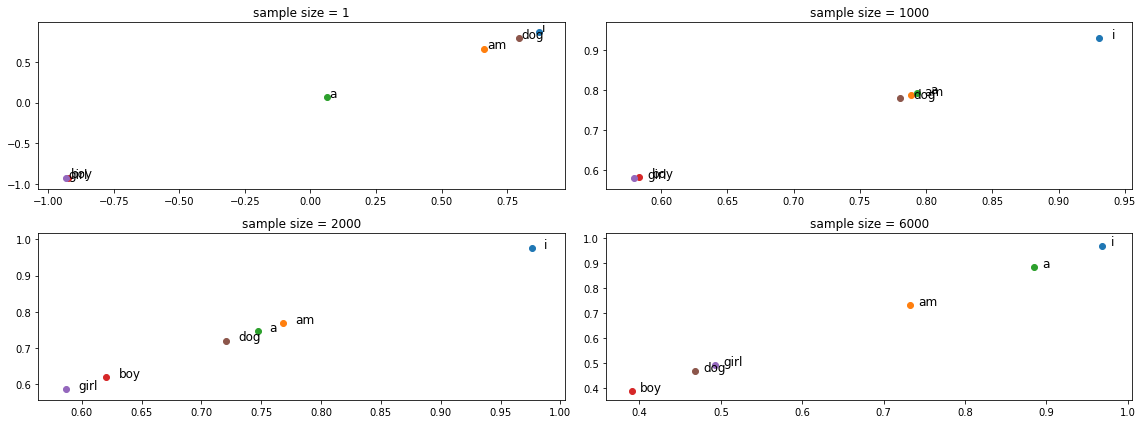

In [340]:

"""
"""

"""
for w in model.wv.index2entity:
    print("{} ==> {}".format(w, model.wv.get_vector(w)))

print(model.wv.most_similar('boy'))


"""

# using tsne and visualization 
"""
# actor + she - actress 
print(model.wv.most_similar(positive=['actor', 'she'], negative='actress', topn=1))
# actress + he - actor
print(model.wv.most_similar(positive=['actress', 'he'], negative='actor', topn=1))
"""
from gensim.models.word2vec import Word2Vec
import matplotlib.pyplot as plt
"""
3차원으로 변경하여 보여주는 것도 괜찮을 것 같은데 흠. 
"""
f, axes = plt.subplots(2, 2, sharex=False, sharey=False)
f.set_size_inches((16, 6)) 
for i in range(0, 2):
    for j in range(0, 2):
        sample_n = [1, 1000, 2000, 6000][i*2+j]
        sent_lst = ["I am a boy", "I am a girl", "I am a dog"]*sample_n
        sent_split_lst = map(lambda s: list(s.lower().split(" ")), sent_lst)

        model = Word2Vec(list(sent_split_lst), size=2, window = 3, min_count=1)
        model.init_sims(replace=True)# 학습 완료 후, 필요없는 메모리 삭제 

        for x, y, t in ((model.wv.get_vector(w)[0], model.wv.get_vector(w)[0], w) for w in model.wv.index2entity):
            axes[i][j].scatter(x, y, cmap=plt.cm.rainbow)
            axes[i][j].text(x+0.01, y, t, fontsize=12)
            axes[i][j].set_title("sample size = {}".format(sample_n))
f.tight_layout()# 그냥 이걸로 다 해결되었다.
plt.savefig('../../assets/images/markdown_img/word_embedding_subplot_20180515.svg')
plt.show()

In [ ]:
# 3차원에 그림 그리기. 

1

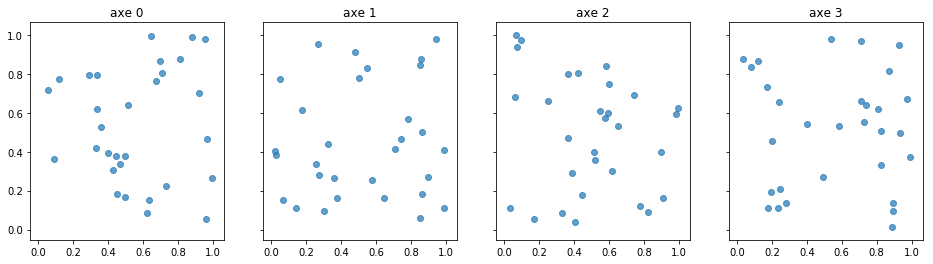

In [317]:
import matplotlib.pyplot as plt
import numpy as np 

f, axes = plt.subplots(1, 4, sharex=True, sharey=True)
"""figure의 크기를 조정, 원래 하던 방식인 f.figsize=(16, 4)로는 낫 워킹. 
"""
f.set_size_inches((16, 4)) 
for i in range(0, 4):
    axes[i].scatter(np.random.random(30), np.random.random(30), alpha=0.7)
    axes[i].set_title("axe {}".format(i))
plt.savefig('../../assets/images/markdown_img/pl_subplot_180515.svg')
plt.show()

In [ ]:
f, axes = plt.subplots(1, 2, sharey=True)
for 
ax1.plot(x, y)
ax1.set_title('Sharing Y axis')
ax2.scatter(x, y)

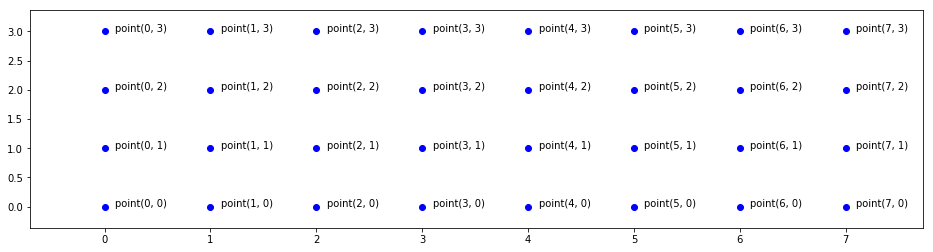

In [235]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 4))
plt.margins(0.1, 0.1)
for x in range(0, 8):
    for y in range(0, 4):
        plt.scatter(x, y, c='b')
        plt.text(x+0.1, y, "point({}, {})".format(x, y), fontsize=10)
plt.savefig("../../assets/images/markdown_img/mat_text_180515.svg")
        
    

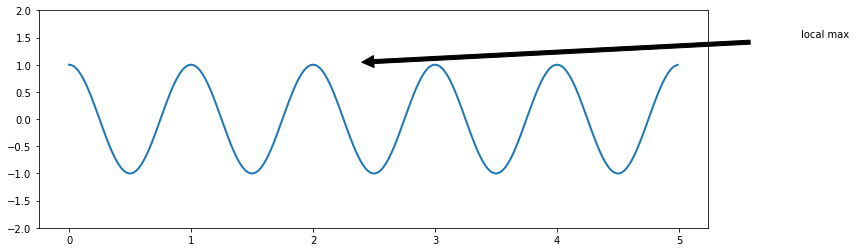

In [248]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(111)

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)
line, = ax.plot(t, s, lw=2)

ax.annotate('local max', xy=(2, 1), xytext=(6, 1.5),
            arrowprops=dict(facecolor='black', shrink=0.1),
           )

ax.set_ylim(-2,2)
plt.savefig('../../assets/images/markdown_img/plt_annotate_20180515.svg')
plt.show()

In [106]:
print("vector of {}:".format('man'))
print(model.wv['man'])
for w1, w2 in [('actor', 'actress'), ('man', 'woman')]:
    print("similarity of {} and {}:".format(w1, w2))
    print(model.wv.similarity(w1, w2))

print()
print(model.wv.most_similar('man'))
print()

122

In [121]:
from nltk.corpus import movie_reviews
sentences = [list(s) for s in movie_reviews.sents()]

print(sentences[:10])
from gensim.models.word2vec import Word2Vec
model = Word2Vec(sentences, size=100) 
# 여기서 사이즈는 vector의 크기를 말합니다. nn의 최종 layer size라고 생각해도 됩니다. 
# 뉴럴넷의 사이즈를 좀 깊게 만들어보고 싶은데, gensim에서 자동으로 해주는지 모르겠네요. 
model.init_sims(replace=True)# 학습 완료 후, 필요없는 메모리 삭제 

print("vector of {}:".format('man'))
print(model.wv['man'])
for w1, w2 in [('actor', 'actress'), ('man', 'woman')]:
    print("similarity of {} and {}:".format(w1, w2))
    print(model.wv.similarity(w1, w2))

print()
print(model.wv.most_similar('man'))
print()
# actor + she - actress 
print(model.wv.most_similar(positive=['actor', 'she'], negative='actress', topn=1))
# actress + he - actor
print(model.wv.most_similar(positive=['actress', 'he'], negative='actor', topn=1))

[['plot', ':', 'two', 'teen', 'couples', 'go', 'to', 'a', 'church', 'party', ',', 'drink', 'and', 'then', 'drive', '.'], ['they', 'get', 'into', 'an', 'accident', '.'], ['one', 'of', 'the', 'guys', 'dies', ',', 'but', 'his', 'girlfriend', 'continues', 'to', 'see', 'him', 'in', 'her', 'life', ',', 'and', 'has', 'nightmares', '.'], ['what', "'", 's', 'the', 'deal', '?'], ['watch', 'the', 'movie', 'and', '"', 'sorta', '"', 'find', 'out', '.'], ['.'], ['.'], ['critique', ':', 'a', 'mind', '-', 'fuck', 'movie', 'for', 'the', 'teen', 'generation', 'that', 'touches', 'on', 'a', 'very', 'cool', 'idea', ',', 'but', 'presents', 'it', 'in', 'a', 'very', 'bad', 'package', '.'], ['which', 'is', 'what', 'makes', 'this', 'review', 'an', 'even', 'harder', 'one', 'to', 'write', ',', 'since', 'i', 'generally', 'applaud', 'films', 'which', 'attempt', 'to', 'break', 'the', 'mold', ',', 'mess', 'with', 'your', 'head', 'and', 'such', '(', 'lost', 'highway', '&', 'memento', ')', ',', 'but', 'there', 'are', '

In [247]:
model.vocabulary.sample

0.001

In [203]:
"""
bipartite graph를 구성해서 거기서부터, similarity를 뽑아낼 수 있지 않을까? 사실 그게 일종의 워드 임베딩 아닌가. 
원래 워드 임베딩은 개별 단어를 중심으로 하는 건데, 여기는 지금 그렇게 구성할 수 가 없을 것 같음. 

author kwd ==> index kwd 
author kwd ==> abstrac noun or verb (or both)

의 형태로 bipartite하게 구성할 수 있는데 이렇게 구성하여, structure equivalence를 만들 수 있지 않을까? 

아무튼 일단 워드 임베딩을 조금만 더 파서 정리는 마저 하는 것이 필요함. 
"""

'\nbipartite graph를 구성해서 거기서부터, similarity를 뽑아낼 수 있지 않을까? 사실 그게 일종의 워드 임베딩 아닌가. \n원래 워드 임베딩은 개별 단어를 중심으로 하는 건데, 여기는 지금 그렇게 구성할 수 가 없을 것 같음. \n\nauthor kwd ==> index kwd \nauthor kwd ==> abstrac noun or verb (or both)\n\n의 형태로 bipartite하게 구성할 수 있는데 이렇게 구성하여, structure equivalence를 만들 수 있지 않을까? \n\n아무튼 일단 워드 임베딩을 조금만 더 파서 정리는 마저 하는 것이 필요함. \n'

In [199]:
import gensim 
ss = ['I', 'am', 'a', 'good', 'boy'] 
bigram_transformer = gensim.models.phrases.Phraser([
    ss
])

AttributeError: 'list' object has no attribute 'threshold'

In [96]:
from gensim.models.word2vec import Word2Vec

model = Word2Vec(abs_lst)
model.init_sims(replace=True)# 학습 완료 후, 필요없는 메모리 삭제 
#model.most_similar("small and medium enterprises")

/Users/frhyme/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """


KeyError: "word 'small and medium enterprises' not in vocabulary"

In [94]:
auth_counter = Counter(itertools.chain.from_iterable(auth_kwd_lst)).most_common()
count1_w = list(filter(lambda x: True if x[1]==5 else False, auth_counter))

In [95]:
for w in count1_w[:10]:
    print(w[0])
    try:
        print(model.most_similar(w[0]))
    except:
        continue
    print()

proximity
[('trust,', 0.7394723892211914), ('experience,', 0.7393851280212402), ('formality', 0.7343860864639282), ('embeddedness', 0.7326754927635193), ("owner's", 0.72593092918396), ('human,', 0.7258467674255371), ('income,', 0.720426619052887), ('structure,', 0.7192338109016418), ('knowledge)', 0.7186062932014465), ('loyalty', 0.717450737953186)]

fuzzy comprehensive evaluation
[('prosthetics', 0.9823917150497437), ('information systems security', 0.9795824289321899), ('wastewater treatment', 0.9777668118476868), ('natural language processing', 0.9777394533157349), ('credit evaluations', 0.977641761302948), ('agile methods', 0.9775588512420654), ('power cables', 0.9772118926048279), ('cost saving', 0.9771889448165894), ('drug blood level', 0.9763650298118591), ('drug bioavailability', 0.9759867787361145)]

spillovers
[('portfolios', 0.7346036434173584), ('appropriability', 0.7307323217391968), ('cross-border', 0.7283568978309631), ('breadth', 0.7144168615341187), ('mind-set', 0.7128

/Users/frhyme/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  after removing the cwd from sys.path.


In [ ]:
from nltk.corpus import movie_reviews
sentences = [list(s) for s in movie_reviews.sents()]

[['plot',
  ':',
  'two',
  'teen',
  'couples',
  'go',
  'to',
  'a',
  'church',
  'party',
  ',',
  'drink',
  'and',
  'then',
  'drive',
  '.'],
 ['they', 'get', 'into', 'an', 'accident', '.'],
 ['one',
  'of',
  'the',
  'guys',
  'dies',
  ',',
  'but',
  'his',
  'girlfriend',
  'continues',
  'to',
  'see',
  'him',
  'in',
  'her',
  'life',
  ',',
  'and',
  'has',
  'nightmares',
  '.'],
 ['what', "'", 's', 'the', 'deal', '?'],
 ['watch', 'the', 'movie', 'and', '"', 'sorta', '"', 'find', 'out', '.'],
 ['.'],
 ['.'],
 ['critique',
  ':',
  'a',
  'mind',
  '-',
  'fuck',
  'movie',
  'for',
  'the',
  'teen',
  'generation',
  'that',
  'touches',
  'on',
  'a',
  'very',
  'cool',
  'idea',
  ',',
  'but',
  'presents',
  'it',
  'in',
  'a',
  'very',
  'bad',
  'package',
  '.'],
 ['which',
  'is',
  'what',
  'makes',
  'this',
  'review',
  'an',
  'even',
  'harder',
  'one',
  'to',
  'write',
  ',',
  'since',
  'i',
  'generally',
  'applaud',
  'films',
  'which',

In [ ]:
from gensim.models.word2vec import Word2Vec
model = Word2Vec(sentences)
model.init_sims(replace=True)# 학습 완료 후, 필요없는 메모리 삭제 

In [101]:
sentences = [
    ["a", 'is', 'not', 'b'], ['b', 'is', 'c']
]
from gensim.models.word2vec import Word2Vec
model = Word2Vec(sentences)
model.init_sims(replace=True)# 학습 완료 후, 필요없는 메모리 삭제 
model.most_similar('a')

RuntimeError: you must first build vocabulary before training the model